## Customer Personality Analysis

### Necessary Imports

In [1]:
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np

### Q1: Initial Dataset preprocessing & cleaning

We read the dataset to observe its shape:

In [2]:
rawDf = pd.read_csv('./marketing_campaign.csv', sep='\t')
rawDf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


We initially search for columns with missing values:

In [3]:
def countMissingByColumn(df: pd.DataFrame):
    temp = df.isnull().sum().sort_values(ascending=False)
    missingDf = pd.DataFrame(temp.loc[temp > 0])
    missingDf.columns = ['Missing']
    return missingDf

countMissingByColumn(rawDf)

,Missing
Income,24


We can see there are missing `Income` values in some rows. Let's examine them in detail:

In [4]:
rawDf.loc[rawDf['Income'].isna()].head(n=8)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0


These rows actually have useful data, excluding the `Income` value, therefore we choose to keep them.\
We can fill the missing `Income` values with the **mean** dataset `Income` value.

In [5]:
rawDf['Income'].fillna(rawDf['Income'].mean(), inplace=True )

In [6]:
# rawDf.loc[rawDf['ID'] == 1994]

There are no longer missing values, in any column:

In [7]:
countMissingByColumn(rawDf)

,Missing


We notice certain columns have non-numerical values:

In [8]:
rawDf.select_dtypes(include='object')

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


We convert `Dt_Customer` string values (dates) to `datetime` objects.\
`Education` & `Marital_Status` will be processed in Q7 using **one hot encoding**.

In [9]:
rawDf['Dt_Customer'] = rawDf['Dt_Customer'].apply(lambda d: datetime.strptime(d, "%d-%m-%Y"))
rawDf['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

### Q2: Simplyfying `Marital_Status` values

Now, as requested, we observe the unique values in the `Education` column:

In [10]:
rawDf['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

As well as the values in the `Marital_Status` column:

In [11]:
rawDf['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

And replace `Marital_Status` values `'Alone'`, `'Absurd'` and `'YOLO'` with `'Single'`

In [12]:
rawDf.replace(to_replace=['Alone','Absurd','YOLO'], value='Single', inplace=True)
rawDf['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

Below we can see the number of customers assigned to each `Marital_Status` and `Education` category:

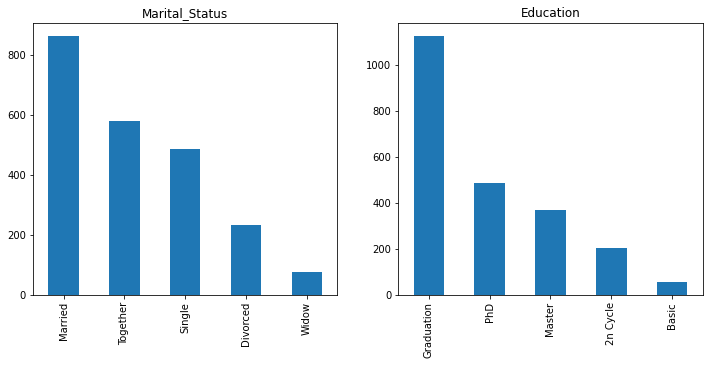

In [13]:
cols = ('Marital_Status', 'Education')
fig, axes = plt.subplots(1, len(cols), figsize=(len(cols)*6, 5))

for i, (ax, col) in enumerate( zip(axes, cols) ):
    ax.set_title(col)
    _ = rawDf[col].value_counts().plot(kind="bar", ax=ax).plot()

We also notice that all `Z_CostContact` and `Z_Revenue` cells have the same values:

In [14]:
rawDf['Z_CostContact'].unique(), rawDf['Z_Revenue'].unique()

(array([3]), array([11]))

Therefore we can drop them entirely:

In [15]:
rawDf.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)